In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from photutils.aperture import aperture_photometry, CircularAperture, CircularAnnulus
from astropy.wcs import WCS
from photutils.detection import DAOStarFinder
from astropy.io import fits
from astropy.coordinates import SkyCoord

In [2]:
im_test='./WCS_Solved/NGC3705/NGC3705_R.fits'
image=fits.open(im_test)[0].data
hdr=fits.open(im_test)[0].header
wcs=WCS(hdr)
print(wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 172.51029444  9.36072906725  
CRPIX : 770.781943321  395.987697601  
CD1_1 CD1_2  : -0.000174355101095  2.2113550891e-06  
CD2_1 CD2_2  : -2.14463484616e-06  -0.000174214452194  
NAXIS : 2048  2054


In [3]:
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2054                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2024-03-13T02:59:00' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
OBSERVAT= 'CAHA    '           / Observatory name                               
OBSCODE = '493     '           / IAU observatory code                           
TELESCOP= 'CA 1.23m'           / Telescope name                                 
INSTRUME= 'DLR-MKIV'           / Instrument name                                
FLENGTH =                988

(0.0, 2048.0)

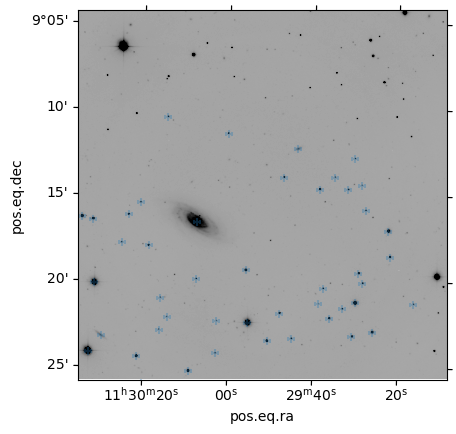

In [11]:
fig=plt.figure()
ax=fig.add_subplot(111,projection=wcs)
plt.imshow(image,vmin=30,vmax=1000,cmap='Greys')
plt.scatter(references[0],references[2],transform=ax.get_transform('world'),marker='+',alpha=0.3)
plt.ylim(0, image.shape[0])
plt.xlim(0, image.shape[1])

In [4]:
references=np.transpose(np.genfromtxt('./testref4.csv',delimiter=',',skip_header=1,filling_values=np.NaN))
print(references[0])
print(references[2])

[172.317502 172.340893 172.342607 172.347752 172.357686 172.365105
 172.366834 172.367589 172.369027 172.371417 172.374808 172.37616
 172.377483 172.382408 172.387366 172.389665 172.395629 172.39984
 172.401387 172.406143 172.410257 172.410643 172.423236 172.431982
 172.436741 172.441167 172.445583 172.446185 172.448649 172.452566
 172.452816 172.460879 172.462834 172.465754 172.466865 172.4799
 172.48225  172.488976 172.500557 172.501466 172.510517 172.51142
 172.53078  172.530781 172.537702 172.550278 172.552077 172.555666
 172.556081 172.559228 172.559837 172.565747 172.567041 172.570663
 172.57259  172.577877 172.577935 172.580781 172.584119 172.585839
 172.588667 172.597539 172.604273 172.618348 172.623621 172.630575
 172.632344 172.636234 172.638494 172.643199 172.648927 172.650847
 172.652669 172.653786 172.674686 172.680918 172.681234 172.698093
 172.700244]
[9.354848 9.309228 9.284264 9.473456 9.382266 9.264628 9.477339 9.335097
 9.240306 9.325538 9.354064 9.214598 9.386696 9.